In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from PIL import Image
from IPython.core.display import HTML
from functools import partial

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.nlvr import create_prompt

c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
interpreter = ProgramInterpreter(dataset='nlvr')

Registering VQA step


c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Registering EVAL step
Registering RESULT step


In [4]:
prompter = partial(create_prompt,method='all')
generator = ProgramGenerator(prompter=prompter,
                             model="gpt-3.5-turbo-instruct")

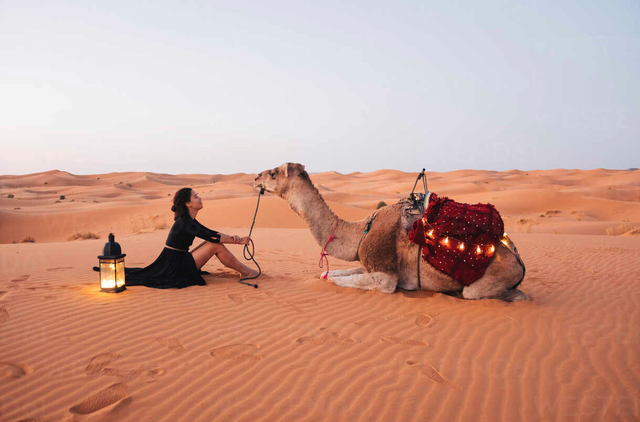

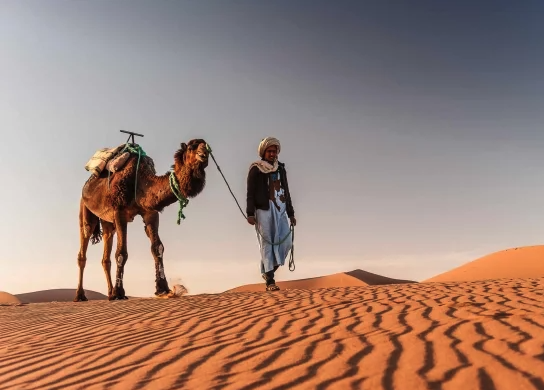

In [5]:
left_image = Image.open('../assets/camel1.png')
left_image.thumbnail((640,640),Image.Resampling.LANCZOS)
right_image = Image.open('../assets/camel2.png')
right_image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    LEFT=left_image.convert('RGB'),
    RIGHT=right_image.convert('RGB'),
)

display(left_image, right_image)

In [6]:
statement = "There is a woman in black in exactly one of the images and two camels in total."

prog,_ = generator.generate(dict(statement=statement))
print(prog)

ANSWER0=VQA(image=LEFT,question='Is there a woman in black in the image?')
ANSWER1=VQA(image=RIGHT,question='Is there a woman in black in the image?')
ANSWER2=VQA(image=LEFT,question='How many camels are in the image?, Please answer in digit format (0, 1, 2, and etc.)')
ANSWER3=VQA(image=RIGHT,question='How many camels are in the image?, Please answer in digit format (0, 1, 2, and etc.)')
ANSWER4=EVAL(expr='{ANSWER0} xor {ANSWER1}')
ANSWER5=EVAL(expr='{ANSWER2} + {ANSWER3} == 2')
ANSWER6=EVAL(expr='{ANSWER4} and {ANSWER5}')
FINAL_ANSWER=RESULT(var=ANSWER6)


VQA


c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


VQA
VQA
VQA
EVAL
EVAL STEP : True != False
EVAL
EVAL STEP : 1 + 1 == 2
EVAL
EVAL STEP : True and True
RESULT
True



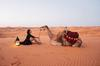
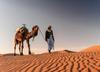
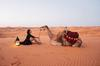
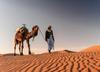

In [7]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

print(result)

HTML(html_str)